In [2]:
!pip install nltk

In [4]:
import nltk
nltk.download("punkt")
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')
stemmer = PorterStemmer()
text = """Ferrari endured a disastrous end to qualifying when Sainz hit the wall at the final corner as he prepared to
                start a lap, putting him 10th, with Charles Leclerc only ninth thanks to his time being deleted for exceeding
                track limits.
                Nico Hulkenberg was a fine sixth for Haas in another trademark qualifying performance from the German,
                while Aston Martin’s Fernando Alonso and RB’s Yuki Tsunoda also capitalised on the Scuderia’s troubles
                to finish P7 and P8."""
sentences = nltk.sent_tokenize(text)
print(sentences)
print(sentences)
for i in range(len(sentences)):
    words = nltk.word_tokenize(sentences[i])
    words = [stemmer.stem(word) for word in words if word.lower() not in set(stopwords.words("english"))]
    sentences[i] = ' '.join(words)
print(sentences)

['Ferrari endured a disastrous end to qualifying when Sainz hit the wall at the final corner as he prepared to\n                start a lap, putting him 10th, with Charles Leclerc only ninth thanks to his time being deleted for exceeding\n                track limits.', 'Nico Hulkenberg was a fine sixth for Haas in another trademark qualifying performance from the German,\n                while Aston Martin’s Fernando Alonso and RB’s Yuki Tsunoda also capitalised on the Scuderia’s troubles\n                to finish P7 and P8.']
['Ferrari endured a disastrous end to qualifying when Sainz hit the wall at the final corner as he prepared to\n                start a lap, putting him 10th, with Charles Leclerc only ninth thanks to his time being deleted for exceeding\n                track limits.', 'Nico Hulkenberg was a fine sixth for Haas in another trademark qualifying performance from the German,\n                while Aston Martin’s Fernando Alonso and RB’s Yuki Tsunoda also capitalis

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
    import re
    corpus = []

    for i in range(len(sentences)):
        rev = re.sub('[^a-zA-Z]', ' ', sentences[i])
        rev = rev.lower()
        rev = rev.split()
        rev = [stemmer.stem(word) for word in rev if not word in set(stopwords.words('english'))]
        rev = ' '.join(rev)
        corpus.append(rev)

In [6]:
corpus

['ferrari endur disastr end qualifi sainz hit wall final corner prepar start lap put th charl leclerc ninth thank time delet exceed track limit',
 'nico hulkenberg fine sixth haa anoth trademark qualifi perform german aston martin fernando alonso rb yuki tsunoda also capitali scuderia troubl finish p p']

In [7]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()

In [8]:
X #Presence of a word in a sentence => 1
  #Absence of a word in a sentence => 0

array([[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
        1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1,
        0],
       [1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
        0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
        1]])

In [9]:
#TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfv = TfidfVectorizer()
X = tfv.fit_transform(corpus).toarray()

In [10]:
X #better than bag of words as values are based on freq and semantics (other than 0 and 1)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.20625685, 0.20625685, 0.20625685, 0.20625685, 0.20625685,
        0.20625685, 0.20625685, 0.        , 0.20625685, 0.20625685,
        0.        , 0.        , 0.        , 0.        , 0.20625685,
        0.        , 0.20625685, 0.20625685, 0.20625685, 0.        ,
        0.        , 0.20625685, 0.        , 0.20625685, 0.20625685,
        0.14675345, 0.        , 0.20625685, 0.        , 0.        ,
        0.20625685, 0.20625685, 0.20625685, 0.20625685, 0.20625685,
        0.        , 0.        , 0.        , 0.20625685, 0.        ],
       [0.21563424, 0.21563424, 0.21563424, 0.21563424, 0.21563424,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.21563424, 0.        , 0.        ,
        0.21563424, 0.21563424, 0.21563424, 0.21563424, 0.        ,
        0.21563424, 0.        , 0.        , 0.        , 0.21563424,
        0.21563424, 0.        , 0.21563424, 0. 

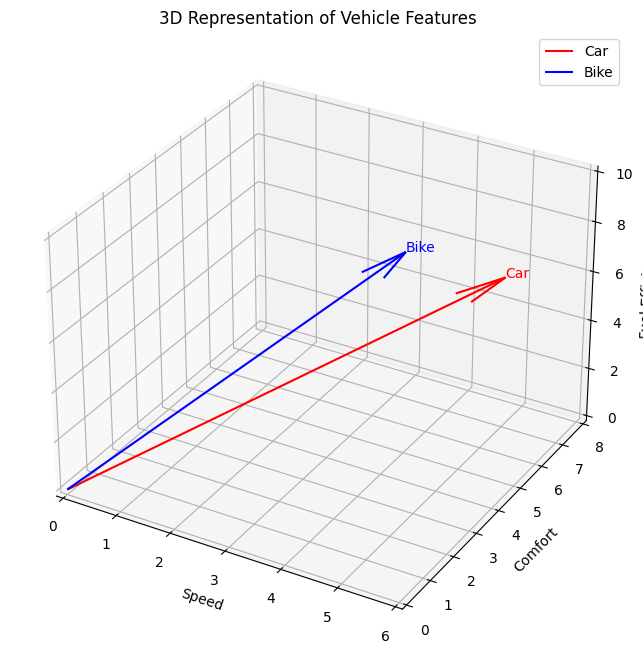

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define features
features = ['Speed', 'Comfort', 'Fuel Efficiency']

# Define vectors for Car and Bike
car_vector = np.array([5, 7, 6])   # Example values for Car
bike_vector = np.array([4, 5, 8])   # Example values for Bike

# Create a figure for the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the vectors using quiver with wider lines
ax.quiver(0, 0, 0, car_vector[0], car_vector[1], car_vector[2], color='r', label='Car', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, bike_vector[0], bike_vector[1], bike_vector[2], color='b', label='Bike', arrow_length_ratio=0.1)

# Add labels to the end of each vector
ax.text(car_vector[0], car_vector[1], car_vector[2], "Car", color='r')
ax.text(bike_vector[0], bike_vector[1], bike_vector[2], "Bike", color='b')

# Set axis labels
ax.set_xlabel('Speed')
ax.set_ylabel('Comfort')
ax.set_zlabel('Fuel Efficiency')
ax.set_title('3D Representation of Vehicle Features')

# Set limits for wider view
ax.set_xlim(0, 6)
ax.set_ylim(0, 8)
ax.set_zlim(0, 10)

# Add a legend and grid
ax.legend()
plt.grid()
plt.show()